# Ejercicio 4 — Imagen = Matriz

## Cargar imagen y canales RGB

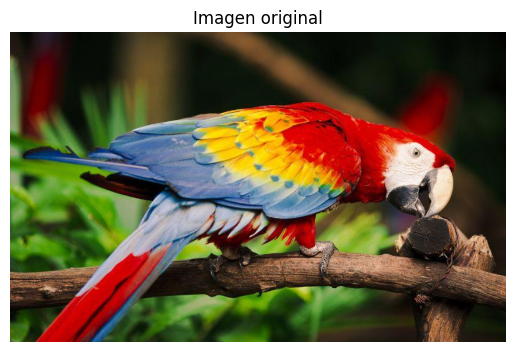

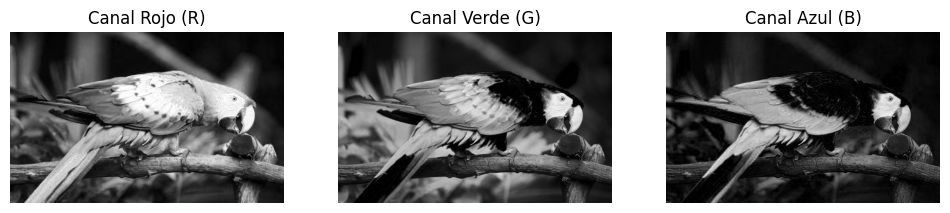

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === Paso 1: Cargar imagen ===
img = cv2.imread('/content/guacamaya_roja.jpg')

# Verificar carga
if img is None:
    print("Error: no se pudo cargar la imagen.")
else:
    # Convertir de BGR (OpenCV) a RGB (matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.title('Imagen original')
    plt.axis('off')
    plt.show()

# === Paso 2: Separar canales RGB ===
b, g, r = cv2.split(img)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(r, cmap='gray')
plt.title('Canal Rojo (R)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title('Canal Verde (G)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(b, cmap='gray')
plt.title('Canal Azul (B)')
plt.axis('off')
plt.show()





## Filtros basicos

### Filtro de Suavizado (Desenfoque Gaussiano)
Se utiliza un filtro Gaussiano para reducir el ruido y el detalle de la imagen resultando en una imagen más suave o borrosa.
El tamaño del kernel (7, 7) determina la intensidad del desenfoque.

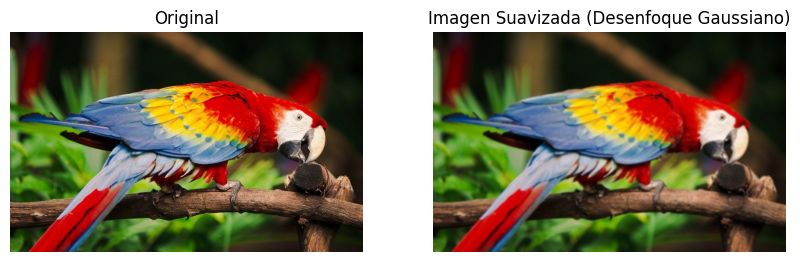

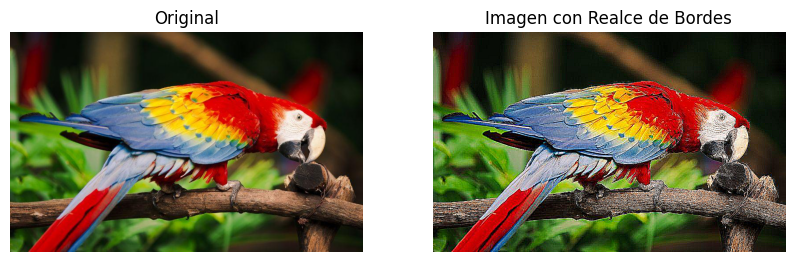

In [3]:
# --- Filtro de Suavizado (Desenfoque Gaussiano) ---
suavizado = cv2.GaussianBlur(img, (7, 7), 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(suavizado, cv2.COLOR_BGR2RGB))
plt.title('Imagen Suavizada (Desenfoque Gaussiano)')
plt.axis('off')
plt.show()

# --- Filtro de Realce de Bordes (Sharpening) ---

kernel_sharpening = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])
realce_bordes = cv2.filter2D(img, -1, kernel_sharpening)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(realce_bordes, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Realce de Bordes')
plt.axis('off')
plt.show()

Operaciones morfológicas

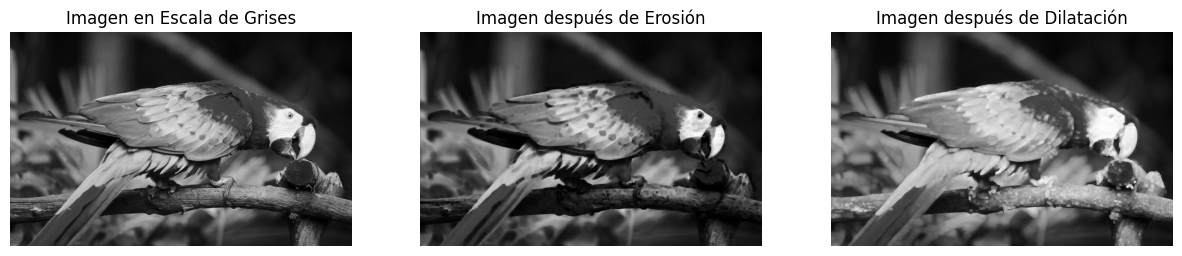

In [5]:
# === Operaciones morfológicas ===

# Paso 1: Convertir la imagen a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Paso 2: Definir un kernel (elemento estructurante)
kernel = np.ones((5,5), np.uint8)

# Paso 3: Aplicar operación de Erosión
erosion = cv2.erode(img_gray, kernel, iterations = 1)

# Paso 4: Aplicar operación de Dilatación
dilatacion = cv2.dilate(img_gray, kernel, iterations = 1)

# Paso 5: Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Imagen después de Erosión')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilatacion, cmap='gray')
plt.title('Imagen después de Dilatación')
plt.axis('off')

plt.show()


### **Explicación de los efectos**:
 - **Erosión**: Se observa que los objetos blancos en la imagen se han reducido de tamaño o 'adelgazado'.
Esto ocurre porque la operación elimina los píxeles de los bordes de los objetos.
 - **Dilatación**: Los objetos blancos en la imagen se han agrandado o 'engrosado'.
La dilatación añade píxeles a los bordes, lo que puede ayudar a cerrar huecos o unir objetos cercanos.